In [59]:
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [60]:
evaluation_results = "../evaluation-results"

data = []
for d in os.listdir(evaluation_results):
    if d.startswith('iteration-'):
        iteration = int(d[10:])
        subdir = os.path.join(evaluation_results, d)
        for d2 in os.listdir(subdir):
            if os.path.isdir(os.path.join(subdir, d2)):
                shuffle_dir = os.path.join(subdir, d2)
                for file in os.listdir(shuffle_dir):
                    if file.endswith('-results.csv'):
                        df = pd.read_csv(os.path.join(shuffle_dir, file), index_col=0)
                        df['trial'] = iteration
                        minimum_test = df[' Test error(px)'].idxmin()
                        minimum_test_withp = df['Test error with p-cutoff'].idxmin()
                        data.append(df.iloc[minimum_test:minimum_test+1, :])
                        if minimum_test != minimum_test_withp:
                            data.append(df.iloc[minimum_test_withp:minimum_test_withp+1, :])
df = pd.concat(data)

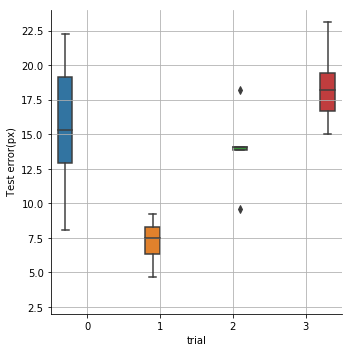

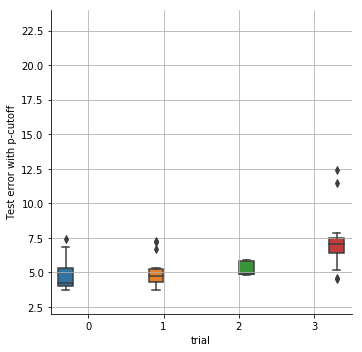

In [72]:
sb.catplot(data=df, x='trial', y=' Test error(px)', hue='trial', kind='box')
plt.ylim(2, 24)
plt.grid()
plt.savefig('test_error.png')

sb.catplot(data=df, x='trial', y='Test error with p-cutoff', hue='trial', kind='box')
plt.ylim(2, 24)
plt.grid()
plt.savefig('test_error_withp.png')